In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
%matplotlib inline

# Задача

Нам потрібно оцінити наскільки високий буде пробуток, якщо ми відкриємо ресторан у певному місті. Для цього ми маємо датасет, в якому кожен рядок це одне місто, відповідно ознака `X` це популяція, а залежна (прогнозована) змінна `y` це прибуток. 

- дописати суть ноутбуку

### Завантажимо дані й подивимось на них

`x_train` - це популяція, але поділена на 10000, тобто 6.1101 - 61101 людина <br>
`y_train` - це середній щомісячний прибуток, але поділений на 10000, тобто 17.592 - 175920 доларів (прибуток може бути відємним)

In [2]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None, names = ['population', 'profit'])

x_train = np.array(data['population'])
y_train = np.array(data['profit'])
 
x_train[:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [3]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


### Візуалізуємо дані

Так як в нас двовимірні дані, дуже зручно буде їх візуалізувати, та пидвитися як вони розміщені.

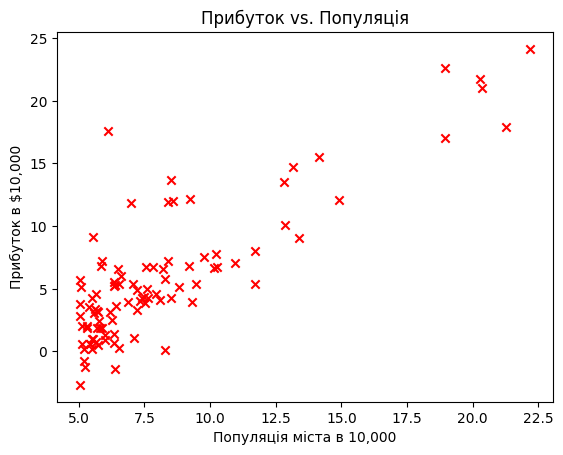

In [4]:
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Прибуток vs. Популяція")
# Set the y-axis label
plt.ylabel('Прибуток в $10,000')
# Set the x-axis label
plt.xlabel('Популяція міста в 10,000')
plt.show()

Виглядає що ці дані мають лінійну залежність, хоч і бувають декілкьа викидів. Лінійна регресія мала б впоратися з завданням передбачення який буде прибуток в залежності від популяціії

<a name="4"></a>
## Linear regression

У цьому ноутбуці ви побудуєте та натренуєте лінійну регресію, знайшовший найкращі параметри $(w,b)$ для ваших даних.
- Функція лінійної регресії яка переводить `x` (популяцію) в `y` (прибуток)
    $$f_{w,b}(x) = wx + b$$
    

- Для побудови алгоритму лінійної регресії вам потрібно найти найкращі параметри $(w,b)$, а для цього потрібно:

    - Реалізувати порівняння, як одні параметри $(w,b)$ кращі чи гірші по відношенню до інших. Для цього потрібна функція втрат $J(w,b)$
  
        - Найкращі $(w,b)$ - це ті які дают ьвмм найменше значння $J(w,b)$.
    
    - Рeалізувати  **gradient descent** для пошуку найменшого $J(w,b). 
    
        - Кожен крок градієнтного спуску ваші параметри $(w,b)$ мають наближатися до мінімального значення $J(w,b)$.
  

- Також потрібно реалізувати передбачення, щоб ви могли передати моделі значення $x$ і вона повернула вам $f_{w,b}(x)$ (прогнозований прибуток.

# Задача 1 - функція втрат

## Compute Cost

#### Cost function
З лекції ви памятаєте, що функція втрат $J(w,b)$ задаєтсья наступною формулою

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- $f_{w,b}(x^{(i)})$ - це передбачення моделі, а  $y^{(i)}$ - це реаьне значення в даних.
- $m$ кількість даних в датасеті

In [7]:
def compute_cost(x, y, w, b): 

    """    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): Обчислена функція J з параметрами w,b від вхідних даних x та y
    """    
    m = len(x)
    total_cost = 0
    
    # ВАШ КОД ТУТ
    total_cost = np.sum((x*w+b-y)**2)/(2*m)
    return total_cost

In [8]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w (zeros): {cost:.3f}')

Cost at initial w (zeros): 75.203


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros):<b> 75.203 </td> 
  </tr>
</table>

# Задача 2 - обчислення та оновлення градієнтів

Алгоритм градієнтного спуску виглядає наступним чином

$$\begin{align*}& \text{доки не досягнули мінімуму:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

параметри $w, b$ обоє мають оновлювати одночасно за такими градієнтами
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m кількість даних

    
*  $f_{w,b}(x^{(i)})$ передбачення моделі, а $y^{(i)}$ реальне значення

In [9]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    # ВАШ КОД ТУТ
    m = len(x)
    dj_db = np.sum(w * x + b - y)/m
    dj_dw = np.sum((w * x + b - y)*x)/m    
    return dj_dw, dj_db

In [10]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [11]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

# Задача 3 - градієнтний спуск

Тепер вам треба реалізувати весь алгоритм градієнтного спуску. Ваші задачі наступні:
- Ви маєте зробити цикл і для кожної ітераці:
    - обчислювати градієнт;
    - оновлювати параметри;
    - обчислювати та зберігати функцію втрат;
    - Друкувати кожні (num_iters/10) ітерацій номер ітерації та поточне значеня функції втрат 

- Для валіадації що ваш алгоритм працюю добре, функція втрат має падати з кожним кроком.

In [40]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, learning_rate, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        
        # ВАШ КОД ТУТ
        
        w_in, b_in = gradient_function(x, y, w, b)
        w = w - learning_rate*w_in
        b = b - learning_rate*b_in
        loss = cost_function(x, y, w, b)
        if i%10==0:
           J_history.append((i, loss)) 
           print(i, loss)
           
        
    
    return w, b, J_history

In [41]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
learning_rate = 0.01

w,b,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient,
                         learning_rate, iterations)

print("w,b found by gradient descent:", w, b)

0 6.737190464870007
10 5.859827889932181
20 5.810817842627869
30 5.76354476854712
40 5.717947107333528
50 5.673965480401506
60 5.631542613611772
70 5.590623262687323
80 5.551154141272754
90 5.513083851543225
100 5.476362817272741
110 5.440943219274565
120 5.406778933129694
130 5.373825469122317
140 5.342039914304029
150 5.311380876611354
160 5.281808430963811
170 5.253284067272322
180 5.225770640290271
190 5.199232321241896
200 5.173634551165021
210 5.148943995907395
220 5.12512850271798
230 5.102157058376736
240 5.079999748808297
250 5.05862772012701
260 5.038013141062576
270 5.018129166717367
280 4.998949903608226
290 4.9804503759472345
300 4.962606493117519
310 4.94539501830176
320 4.928793538222535
330 4.912780433955111
340 4.897334852774656
350 4.88243668100122
360 4.868066517807122
370 4.85420564995264
380 4.840836027417081
390 4.827940239893541
400 4.8155014941166865
410 4.80350359199409
420 4.791930909512612
430 4.780768376392351
440 4.770001456461701
450 4.7596161287279255
460

**Очікуваний результат**:
<table>
  <tr>
    <td> <b> Iteration    0:<b></td>
    <td> <b> Cost     6.74<b></td>   
  </tr>
  <tr>
    <td> <b> Iteration    150:<b></td>
    <td> <b> Cost     5.31<b></td>   
  </tr>
  <tr>
    <td> <b> Iteration    300:<b></td>
    <td> <b> Cost     4.96<b></td>   
  </tr>
  <tr>
    <td> <b> ...<b></td>
    <td> <b> ...<b></td>   
  </tr>
  <tr>
    <td> <b> Iteration 1350:<b></td>
    <td> <b> Cost     4.49<b></td>   
  </tr>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

In [42]:
# тепер використовуючи наші параметри давайте зробимо передбачення
predicted = w * x_train + b
predicted

array([ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
        6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
        3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
        2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
        3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
       18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
        2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
        5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
        2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
        4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
        5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
        3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
        6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
        4.78874528,  6.04480089,  8.30859358,  2.78400167, 20.09

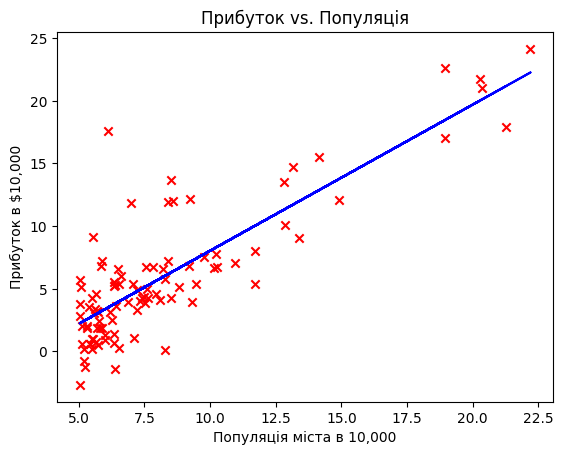

In [43]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Прибуток vs. Популяція")
# Set the y-axis label
plt.ylabel('Прибуток в $10,000')
# Set the x-axis label
plt.xlabel('Популяція міста в 10,000')
plt.show()

### Результати

Ми побудували модель і найшли найкращу пряму яка описує наші дані, по графіку не дуже видно наскілкьи наша модель класна, давайте порахуємо ще метрику, а саме MSE - Середню квадратичну помилку.

In [44]:
from sklearn.metrics import mean_squared_error

print('На тренувальних даних MSE =', mean_squared_error(y_train, predicted))

На тренувальних даних MSE = 8.966776513175452


# Задача 4

Ви реалізували лінійну регресію власноруч, тепер було б добре додати туди поліноміальні ознаки, але для цього легше використати готову реалізацію з sklearn.

Ваша задача імпортувати з sklearn лінійну регресію, створити поліноміальні ознаки та натренувати її.

Спробуйте досягнути значення MSE менше 2. 

In [148]:
# ВАШ КОД ТУТ
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dataset = pd.DataFrame({'population': data['population']})

poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(dataset)

x_train = x_poly


model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)
predicted = model.predict(x_train)

print('На тренувальних даних MSE =', mean_squared_error(y_train, predicted))

-3.4523779357407793
[0.         1.10087207 0.00379118]
На тренувальних даних MSE = 8.948858779097986


(97, 3)
(97,)


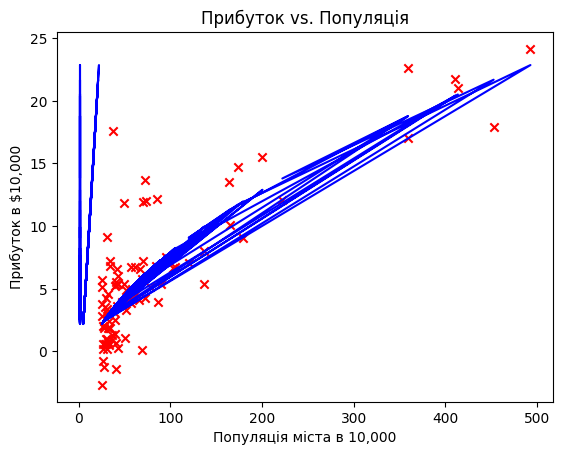

In [149]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")
print(np.shape(x_train))
print(np.shape(y_train))

# Create a scatter plot of the data. 
plt.scatter(x_train[:,-1], y_train, marker='x', c='r') 

# Set the title
plt.title("Прибуток vs. Популяція")
# Set the y-axis label
plt.ylabel('Прибуток в $10,000')
# Set the x-axis label
plt.xlabel('Популяція міста в 10,000')
plt.show()